### Step 1. Check working directory and import the necessary libraries

In [128]:
import os
print(os.getcwd())

/Users/eylul/Desktop/LaunchCode/Project


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pip install matplotlib==3.1.0

# Figures inline and set visualization style
%matplotlib inline
sns.set()

### Step 2. Import and name the dataset

In [130]:
heart = pd.read_csv('heart.csv')
#check type
print(type(heart))
heart.head()

<class 'pandas.core.frame.DataFrame'>


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Step 3. Properties and description of the dataset
#### Step 3.1. rows and columns

In [131]:
heart.shape

(303, 14)

We have 303 rows and 14 columns.
#### Step 3.2. types of columns

In [132]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

All of our variables are coded as integers or floating numbers.

#### Step 3.3. How is the dataset indexed?

In [133]:
heart.index

RangeIndex(start=0, stop=303, step=1)

#### Step 3.4. Basic description of the data

In [134]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Our sample's age ranges from 29 to 77, with a mean of 54.37.
* Sex is dummy coded (1 = male, 0 = female). We have more males than females.
* Chest pain type ranges from 0 to 3.
* Our sample's resting blood pressure ranges from 94 to 200, with a mean of 131.62.
* Our sample's cholestoral ranges from 126 to 564, with a mean of 246.26.
* Our sample's fasting blood sugar is dummy coded, 1 for higher than 120 mg/dl, 0 for lower. We have more people who have fasting blood sugar lower than 120 mg/dl.
* Our sample's resting electrocardiographic results range from 0 to 2. 
* The maximum heart rate achieved ranges from 71 to 202, with a mean of 149.65.
* Exercise induced angina is dummy coded (1 = yes, 0 = no). Most of our of sample did not experience angina after exercise.
* ST depression induced by exercise relative to rest ranges from 0 to 6.2, with a mean of 1.04.
* Our sample's slope for the peak exervise ST segment ranges from 0 to 2, with a mean of 1.40.
* Our sample's number of major vessels colored by flourosopy ranges from 0 to 4. There might be an error during data entry for people who received 4 because according to Kaggle this measure ranges from 0-3 not 0-4.
* thal ranges from 0 to 3, although the explanation for this variable is 3 = normal; 6 = fixed defect; 7 = reversable defect. There might be a problem here as well.
* Our target (getting a heart disease or not) is binary coded (1 = yes, 0 = no).

Looking further into variables, from the original website, https://archive.ics.uci.edu/ml/datasets/heart+Disease, I found out what chest pain type (cp), resting electrocardiographic results, the slope of the peak exercise ST segment actually are:

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
Here our values range from 0 to 3, I will assume that 0 corresponds to 1 of the original dataset.

restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
Here our values range from 0 to 2, I will assume that 0 corresponds to 1 of the original dataset.

For thal, the original website says "thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)", but our values are from 0 to 3. Therefore, we still have a problem here. Given that our data range from 0 to 3, and they report three values, it is hard to understand which values correspond to which.

Let's address these issues:

#### Step 3.5. Reorganizing the dataset

In [135]:
#Our cp values range from 0 to 3, not 1 to 4.
heart['cp'][heart['cp'] == 0] = 'typical angina'
heart['cp'][heart['cp'] == 1] = 'atypical angina'
heart['cp'][heart['cp'] == 2] = 'non-anginal pain'
heart['cp'][heart['cp'] == 3] = 'asymptomatic'

#Our restecg values range from 0 to 2, same as the original website.
heart['restecg'][heart['restecg'] == 0] = 'normal'
heart['restecg'][heart['restecg'] == 1] = 'ST-T wave abnormality'
heart['restecg'][heart['restecg'] == 2] = 'left ventricular hypertrophy'

#Our slope values range from 0 to 2, not 1 to 3.
heart['slope'][heart['slope'] == 0] = 'upsloping'
heart['slope'][heart['slope'] == 1] = 'flat'
heart['slope'][heart['slope'] == 2] = 'downsloping'

#Even though we do not know what the values of thal is, we know they are categorical, not numeric ranks. Therefore, I changed the type of thal.
heart['thal'] = heart['thal'].astype('object')

print(heart.dtypes)
heart.head()

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,upsloping,0,1,1
1,37,1,non-anginal pain,130,250,0,ST-T wave abnormality,187,0,3.5,upsloping,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,downsloping,0,2,1
3,56,1,atypical angina,120,236,0,ST-T wave abnormality,178,0,0.8,downsloping,0,2,1
4,57,0,typical angina,120,354,0,ST-T wave abnormality,163,1,0.6,downsloping,0,2,1


### Step 4. Missing values, outliers, duplicates
#### Step 4.1. Duplicates

In [136]:
heart.duplicated().sum()

1

There is one duplicate. Let's find its index.

In [137]:
duplicate = heart.duplicated() 
duplicate.index[duplicate].tolist()

[164]

The row 164 is a duplicate row.

In [138]:
heart.iloc[164]
heart.loc[heart.loc[:,'age']==38.0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,non-anginal pain,138,175,0,ST-T wave abnormality,173,0,0.0,downsloping,4,2,1
164,38,1,non-anginal pain,138,175,0,ST-T wave abnormality,173,0,0.0,downsloping,4,2,1
259,38,1,asymptomatic,120,231,0,ST-T wave abnormality,182,1,3.8,flat,0,3,0


Given that row 164 is identical with row 163, and chances of having identical values in all columns is low, I will eliminate row 164 and continue with my EDA.

In [139]:
heart = heart.drop_duplicates()
heart.shape

(302, 14)

#### Step 4.2. Missing values

In [140]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We do not have missing data (yay!).

#### Step 4.3. Outliers
I will check outliers separately for wide and narrow-ranged variables.
##### Wide range

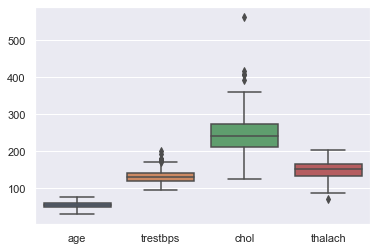

In [141]:
sns.boxplot(data = heart[['age','trestbps', 'chol', 'thalach']])

There seems to be outliers for all except age. Let's take a closer look.

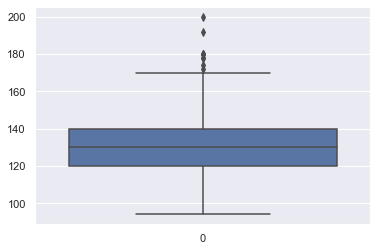

In [142]:
sns.boxplot(data = heart.trestbps)

Outliers do not seem that bad, transformation can potentially fix this.

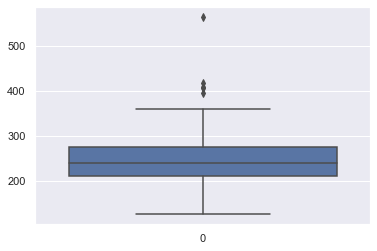

In [143]:
sns.boxplot(data = heart.chol)

One outlier is too high, potentially skewing the distribution. This might be an entry error.

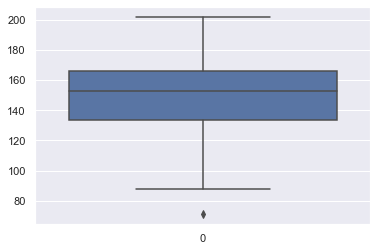

In [144]:
sns.boxplot(data = heart.thalach)

Outliers do not seem that bad, transformation can potentially fix this.

##### Narrow range

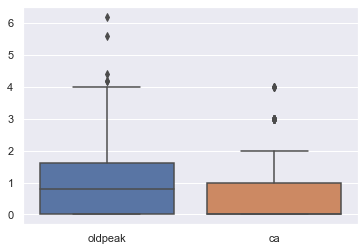

In [145]:
sns.boxplot(data = heart[['oldpeak', 'ca']])

There are outliers for both of these variables. Given that there should not be 4s for ca, and therefore, they are most likely to be a mistake during data entry, let's eliminate those. Let's first find out how many 4s are there.

In [146]:
heart.ca[heart['ca'] == 4].count()

4

Along with these 4 people, let's also exclude the person with extremely high cholestoral.

In [147]:
heart_new = heart[(heart['chol']< 500) & (heart['ca']< 4)]
heart_new.shape

(297, 14)

### Step 5. Relationships between the label and features

#### Step 5.1. Sex

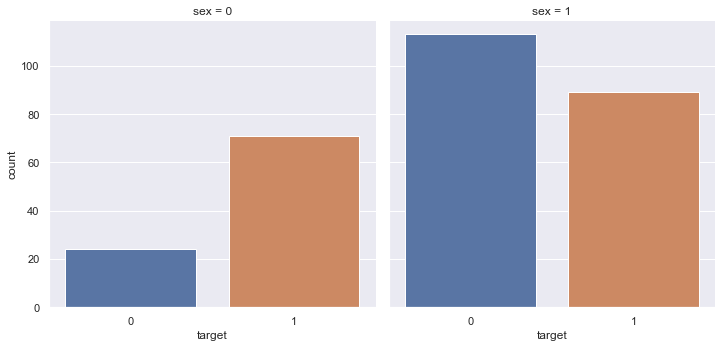

In [148]:
sns.catplot(x='target', col='sex', kind='count', data=heart_new)

In our dataset, females and males have different outcomes for heart diseases. Higher proportion of females have heart diseases than males. Let's calculate.

In [149]:
print('proportion for females:', heart_new[heart_new.sex == 0].target.sum()/heart_new[heart_new.sex == 0].target.count())
print('proportion for males:', heart_new[heart_new.sex == 1].target.sum()/heart_new[heart_new.sex == 1].target.count())

proportion for females: 0.7473684210526316
proportion for males: 0.4405940594059406


#### Step 5.2. Age

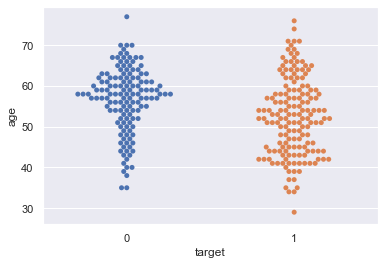

In [150]:
sns.swarmplot(x='target', y='age', data=heart_new)

Age does not seem to be highly related to getting heart diseases. If anything, there is a negative relationship. People are more likely to get heart diseases when they are younger, but this might be due to the fact that people with heart diseases do not live as long, and therefore, in our sample, people who are older most likely do not have heart diseases.

#### Step 5.3. Chest pain

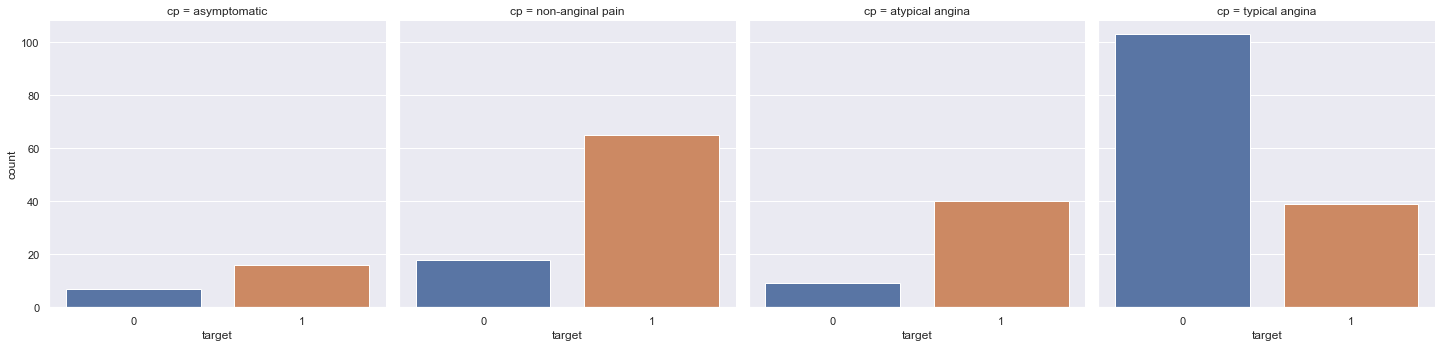

In [151]:
sns.catplot(x='target', col='cp', kind='count', data=heart_new)

Non-anginal pain and atypical angina seems to increase the chances of getting a hear diesase, meaning chest pain type might be a factor in it.

#### Step 5.4. Resting blood pressure

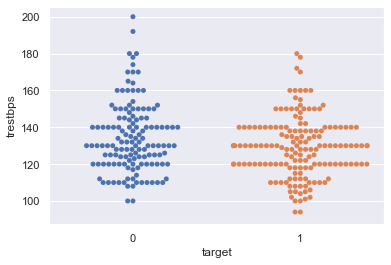

In [152]:
sns.swarmplot(x='target', y='trestbps', data=heart_new)

In [153]:
heart_new.groupby('target').trestbps.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,137.0,134.416058,18.797545,100.0,120.0,130.0,145.0,200.0
1,160.0,129.256250,16.335418,94.0,120.0,130.0,140.0,180.0


Resting blood pressure does not seem to be highly related to heart disease, and if anything negatively related.

#### Step 5.5. Cholestoral

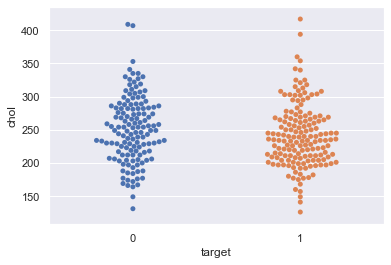

In [154]:
sns.swarmplot(x='target', y='chol', data=heart_new)

In [155]:
heart_new.groupby('target').chol.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,137.0,251.116788,49.634853,131.0,217.00,249.0,283.00,409.0
1,160.0,241.318750,47.368802,126.0,208.75,235.0,267.25,417.0


Cholestoral does not seem to be highly related to heart disease, and if anything negatively related.

#### Step 5.6. Fasting blood sugar

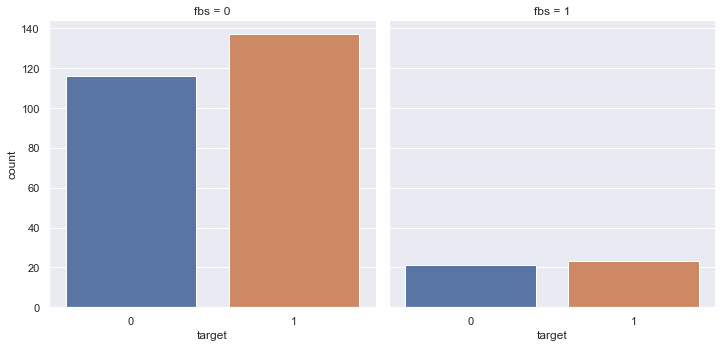

In [156]:
sns.catplot(x='target', col='fbs', kind='count', data=heart_new)

Fasting blood sugar does not seem to be related to heart disease.

#### Step 5.7. Resting electrocardiographic

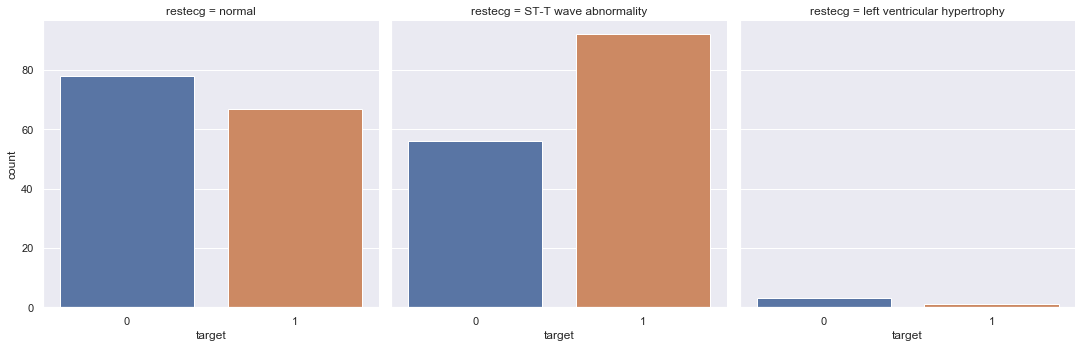

In [157]:
sns.catplot(x='target', col='restecg', kind='count', data=heart_new)

ST-T wave abnormality seems to increase the chances of getting a heart disease. 

#### Step 5.8. Maximum heart rate achieved

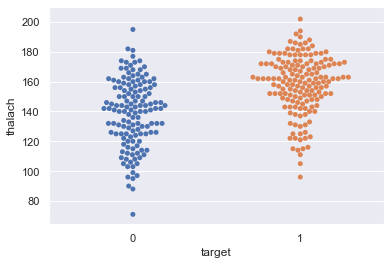

In [158]:
sns.swarmplot(x='target', y='thalach', data=heart_new)

In [159]:
heart_new.groupby('target').thalach.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,137.0,139.072993,22.679232,71.0,125.00,142.0,156.0,195.0
1,160.0,158.300000,19.352019,96.0,148.75,161.0,172.0,202.0


Maximum heart rate achieved seems to be positively related to getting heart diseases.

#### Step 5.9. Exercise induded angina

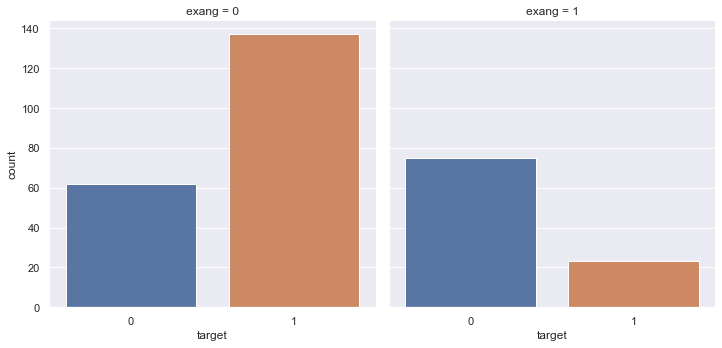

In [160]:
sns.catplot(x='target', col='exang', kind='count', data=heart_new)

Exercise induded angina seems to be negatively related to getting heart diseases.

#### Step 5.10. ST depression induced

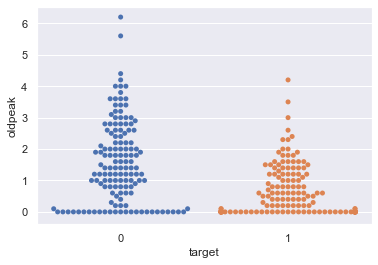

In [161]:
sns.swarmplot(x='target', y='oldpeak', data=heart_new)

In [162]:
heart_new.groupby('target').oldpeak.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,137.0,1.59635,1.298835,0.0,0.6,1.4,2.500,6.2
1,160.0,0.58875,0.784519,0.0,0.0,0.2,1.025,4.2


ST depression induced seems to be negatively related to getting heart diseases.

#### Step 5.11. The slope of the peak exercise ST segment

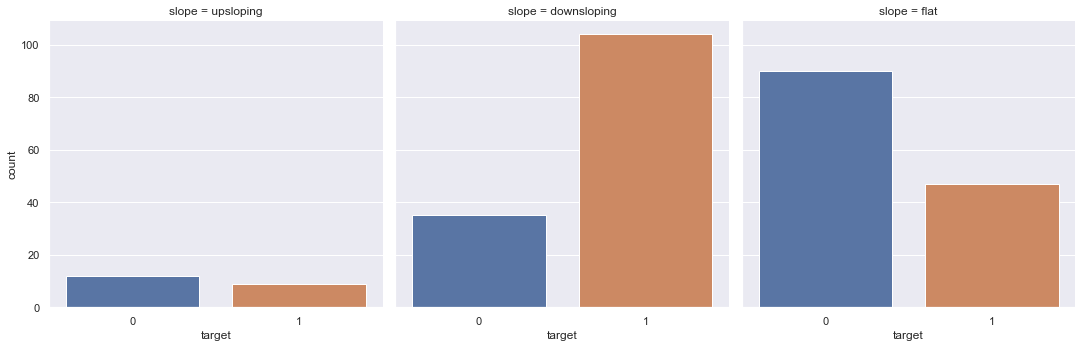

In [163]:
sns.catplot(x='target', col='slope', kind='count', data=heart_new)

Having a downsloping slope of the peak exercise ST segment seems to increase the chances of getting a heart disease.

#### Step 5.12. Number of major vessels

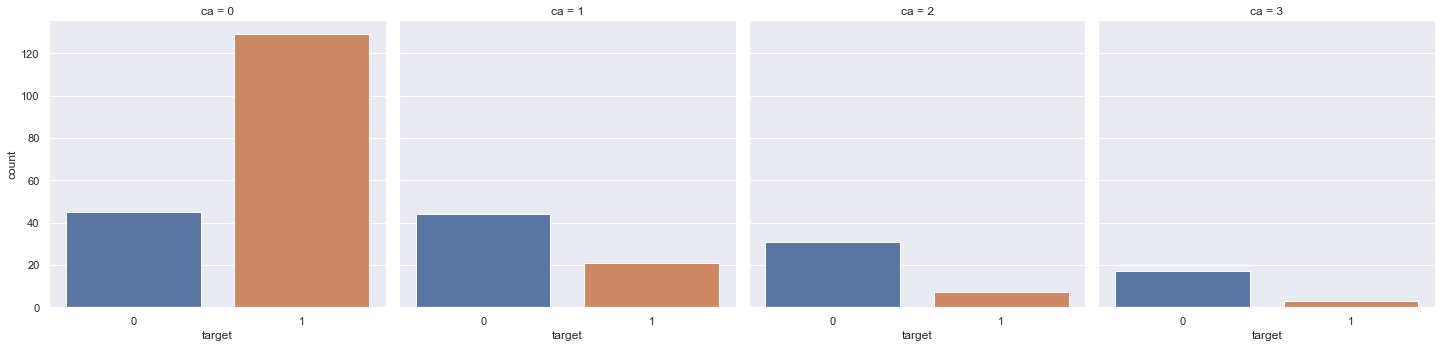

In [164]:
sns.catplot(x='target', col='ca', kind='count', data=heart_new)

The number of major vessels colored by flourosopy seems to be negatively related to getting heart diseases.

#### Step 5.13. thal

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


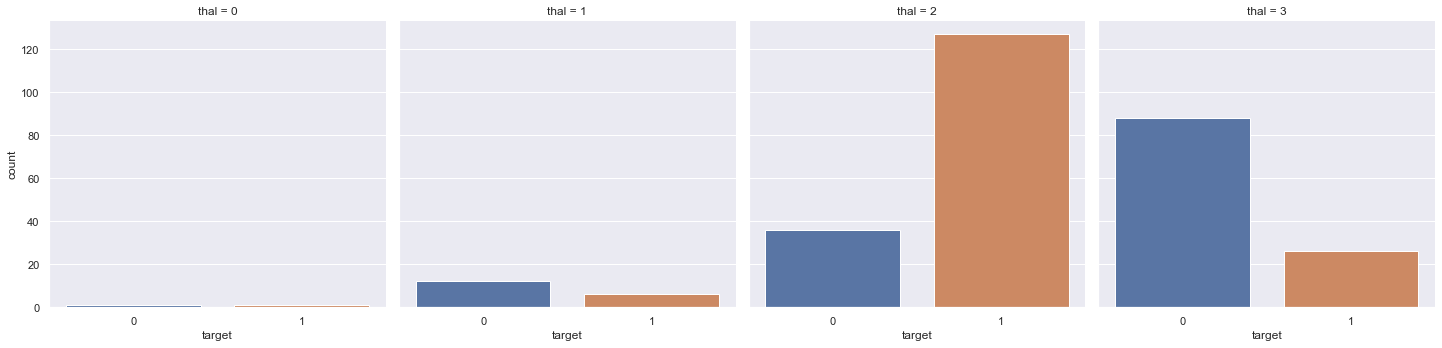

In [165]:
sns.factorplot(x='target', col='thal', kind='count', data=heart_new)

Thal seems to be related to getting heart diseases, but because this is a categorical variable and we do not know what the codes correspond to it is hard to make interpretations.

#### Step 5.14. Verifying these with correlations
Pearson correlation is used because these are interval level features (besides the labels).

In [166]:
heart_new[['age','trestbps', 'chol', 'thalach', 'target']].corr()

,age,trestbps,chol,thalach,target
age,1.000000,0.294691,0.185768,-0.397342,-0.229524
trestbps,0.294691,1.000000,0.157286,-0.049409,-0.145789
chol,0.185768,0.157286,1.000000,-0.009804,-0.100687
thalach,-0.397342,-0.049409,-0.009804,1.000000,0.417164
target,-0.229524,-0.145789,-0.100687,0.417164,1.000000


Spearman-rank correlation is used because these are ordinal level features (besides the labels).


In [220]:
heart_new.rank()
heart_new[['oldpeak', 'ca', 'target']].corr('spearman')

,oldpeak,ca,target
oldpeak,1.000000,0.266843,-0.422619
ca,0.266843,1.000000,-0.491692
target,-0.422619,-0.491692,1.000000


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


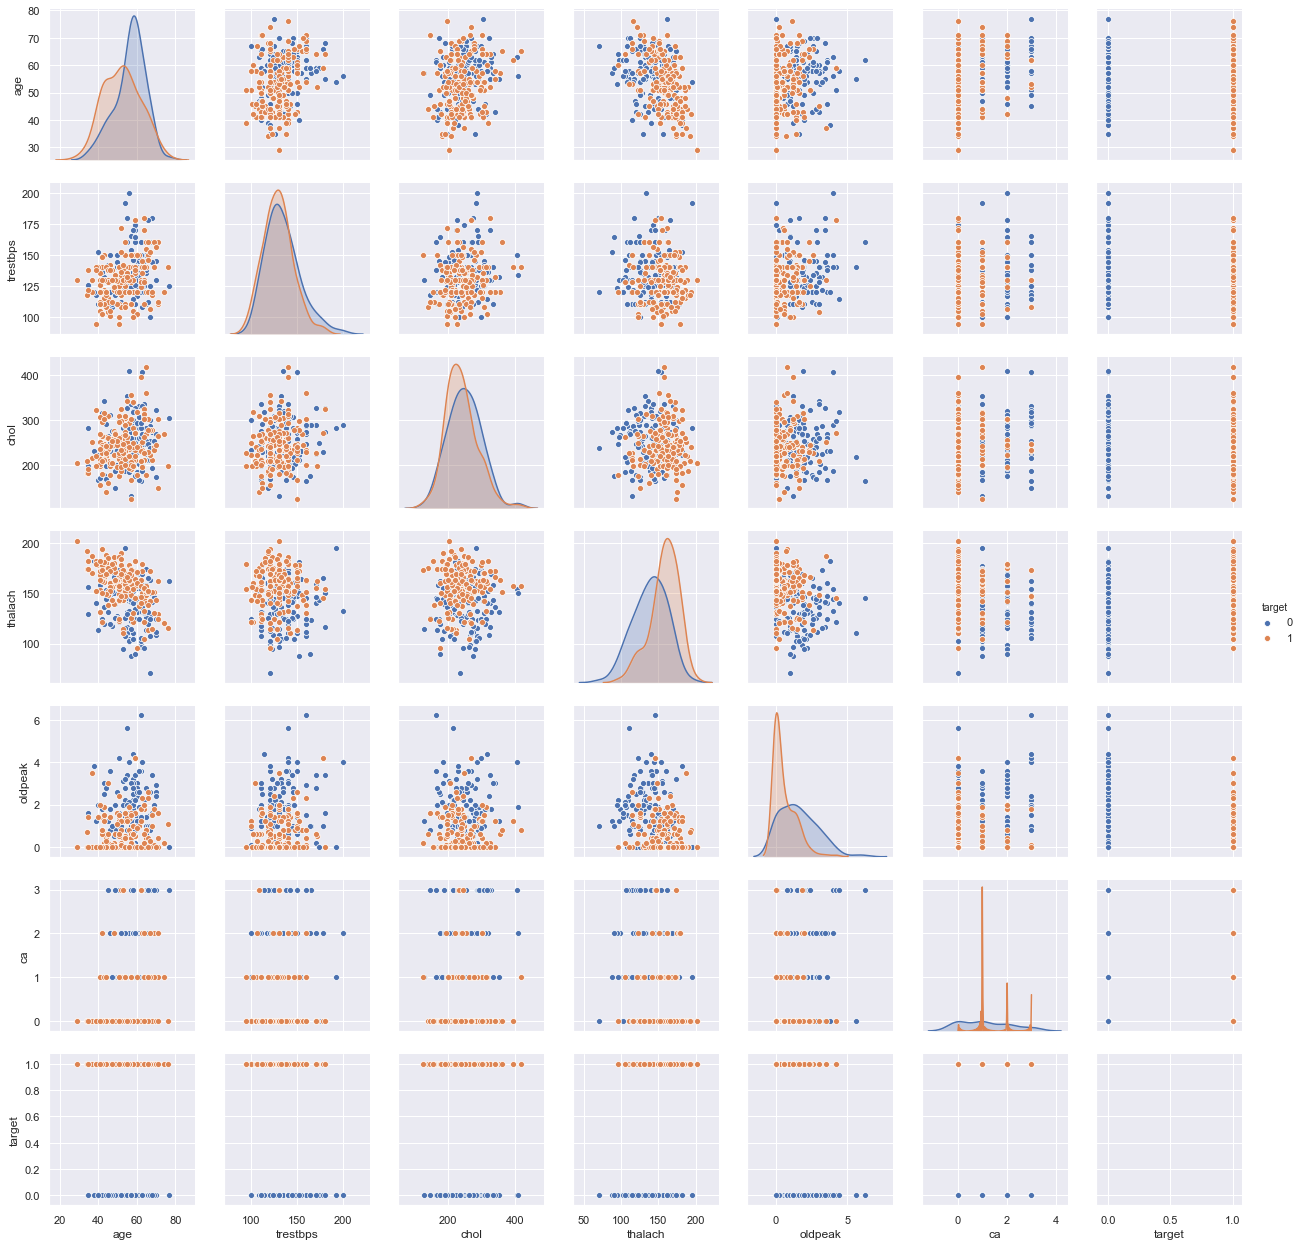

In [221]:
# a visual demonstration of this
sns.pairplot(heart_new[['age','trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']], hue='target')

### Step 5. Feature selection

In [217]:
heart_new = pd.get_dummies(heart_new, drop_first=True)
#move target column to the last
target = heart_new.pop('target')
heart_new['target'] =  target
heart_new.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_3,target
0,63,1,145,233,1,150,0,2.3,0,0,0,0,0,1,0,1,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,0,1,0,0,0,0,1,0,1,0,1
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,1,0,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,0,0,0,0,0,1,0,1
4,57,0,120,354,0,163,1,0.6,0,0,0,1,0,0,0,0,0,1,0,1


In [218]:
heart_new.shape

(297, 20)

In [219]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = heart_new.iloc[:,0:19]
Y = heart_new.iloc[:,-1]
names = heart_new.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1315, 'ca'), (0.1298, 'cp_typical angina'), (0.114, 'oldpeak'), (0.1112, 'thal_2'), (0.0813, 'chol'), (0.0792, 'thalach'), (0.0661, 'trestbps'), (0.0651, 'age'), (0.0568, 'slope_flat'), (0.0555, 'thal_3'), (0.0275, 'sex'), (0.0258, 'exang'), (0.0181, 'restecg_normal'), (0.0151, 'cp_atypical angina'), (0.0106, 'cp_non-anginal pain'), (0.006, 'slope_upsloping'), (0.0041, 'thal_1'), (0.0024, 'fbs'), (0.0, 'restecg_left ventricular hypertrophy')]


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features as the number of major vessels, ST depression induced by exercise, maximum heart rate achieved, thal_2 and thal_3 (still unknown), resting blood pressure,  age, chest pain type of typical angina, exercise induced angina, and cholestoral seem to explain the chances of getting a heart disease more so than other factors.